In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
train=pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
test=pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")

In [3]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
train["LotFrontage"].fillna(train["LotFrontage"].mean(),inplace=True)

In [5]:
train.drop(["Alley","Fence","PoolQC","MiscFeature","FireplaceQu"],axis=1,inplace=True)

In [6]:
train["Electrical"].fillna(train["Electrical"].mode()[0],inplace=True)
train["MasVnrType"].fillna(train["MasVnrType"].mode()[0],inplace=True)
train["MasVnrArea"].fillna(train["MasVnrArea"].mode()[0],inplace=True)
train["BsmtQual"].fillna(train["BsmtQual"].mode()[0],inplace=True)
train["BsmtCond"].fillna(train["BsmtCond"].mode()[0],inplace=True)
train["BsmtExposure"].fillna(train["BsmtExposure"].mode()[0],inplace=True)
train["BsmtFinType1"].fillna(train["BsmtFinType1"].mode()[0],inplace=True)
train["BsmtFinType2"].fillna(train["BsmtFinType2"].mode()[0],inplace=True)

In [7]:
train["GarageType"].fillna(train["GarageType"].mode()[0],inplace=True)
train["GarageQual"].fillna(train["GarageQual"].mode()[0],inplace=True)
train["GarageYrBlt"].fillna(train["GarageYrBlt"].mode()[0],inplace=True)
train["GarageFinish"].fillna(train["GarageFinish"].mode()[0],inplace=True)
train["GarageCond"].fillna(train["GarageCond"].mode()[0],inplace=True)

In [8]:
test["LotFrontage"].fillna(test["LotFrontage"].mean(),inplace=True)
test.drop(["Alley","Fence","PoolQC","MiscFeature","FireplaceQu"],axis=1,inplace=True)
test["Electrical"].fillna(test["Electrical"].mode()[0],inplace=True)
test["MasVnrType"].fillna(test["MasVnrType"].mode()[0],inplace=True)
test["MasVnrArea"].fillna(test["MasVnrArea"].mode()[0],inplace=True)
test["BsmtQual"].fillna(test["BsmtQual"].mode()[0],inplace=True)
test["BsmtCond"].fillna(test["BsmtCond"].mode()[0],inplace=True)
test["BsmtExposure"].fillna(test["BsmtExposure"].mode()[0],inplace=True)
test["BsmtFinType1"].fillna(test["BsmtFinType1"].mode()[0],inplace=True)
test["BsmtFinType2"].fillna(test["BsmtFinType2"].mode()[0],inplace=True)
test["GarageType"].fillna(test["GarageType"].mode()[0],inplace=True)
test["GarageQual"].fillna(test["GarageQual"].mode()[0],inplace=True)
test["GarageYrBlt"].fillna(test["GarageYrBlt"].mode()[0],inplace=True)
test["GarageFinish"].fillna(test["GarageFinish"].mode()[0],inplace=True)
test["GarageCond"].fillna(test["GarageCond"].mode()[0],inplace=True)

In [9]:
test["MSZoning"].fillna(test["MSZoning"].mode()[0],inplace=True)
test["Utilities"].fillna(test["Utilities"].mode()[0],inplace=True)
test["Exterior1st"].fillna(test["Exterior1st"].mode()[0],inplace=True)
test["Exterior2nd"].fillna(test["Exterior2nd"].mode()[0],inplace=True)
test["BsmtFinSF1"].fillna(test["BsmtFinSF1"].mode()[0],inplace=True)
test["BsmtFinSF2"].fillna(test["BsmtFinSF2"].mode()[0],inplace=True)
test["BsmtUnfSF"].fillna(test["BsmtUnfSF"].mode()[0],inplace=True)
test["TotalBsmtSF"].fillna(test["TotalBsmtSF"].mode()[0],inplace=True)
test["BsmtFullBath"].fillna(test["BsmtFullBath"].mode()[0],inplace=True)
test["BsmtHalfBath"].fillna(test["BsmtHalfBath"].mode()[0],inplace=True)
test["KitchenQual"].fillna(test["KitchenQual"].mode()[0],inplace=True)
test["Functional"].fillna(test["Functional"].mode()[0],inplace=True)
test["GarageCars"].fillna(test["GarageCars"].mode()[0],inplace=True)
test["GarageArea"].fillna(test["GarageArea"].mode()[0],inplace=True)
test["SaleType"].fillna(test["SaleType"].mode()[0],inplace=True)

In [10]:
X=train[['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition']]
y=train[['SalePrice']]
X_test=test[['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition']]

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
integer_columns = X.select_dtypes(include=['int64']).columns
float_columns = X.select_dtypes(include=['float64']).columns
X_train_scaled = X.copy()
features = X_train_scaled[integer_columns]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
X_train_scaled[integer_columns] = features
features = X_train_scaled[float_columns]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
X_train_scaled[float_columns] = features

In [13]:
integer_columns = X_test.select_dtypes(include=['int64']).columns
float_columns = X_test.select_dtypes(include=['float64']).columns
X_test_scaled = X_test.copy()
features = X_test_scaled[integer_columns]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
X_test_scaled[integer_columns] = features
features = X_test_scaled[float_columns]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
X_test_scaled[float_columns] = features

In [14]:
X=X_train_scaled.copy()
X_test=X_test_scaled.copy()

In [15]:
X=pd.get_dummies(X)
X_test=pd.get_dummies(X_test)
y=np.asarray(y).ravel()

In [16]:
X.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=270)

In [17]:
X_test.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=254)

In [18]:
result = set(X)-set(X).intersection(X_test)

In [19]:
result=list(result)

In [20]:
X_t=X_test.copy()
for i in result:
    X_t[result]= 0

In [21]:
X_test=X_t.copy()

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [23]:
model = Sequential()
model.add(Dense(1460,activation='relu'))
model.add(Dense(730,activation='relu'))
model.add(Dense(365,activation='relu'))
model.add(Dense(150,activation='relu'))
model.add(Dense(75,activation='relu'))
model.add(Dense(1))
model.compile(optimizer="adam",loss=keras.losses.MeanSquaredLogarithmicError())

2022-12-06 13:09:24.971995: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-06 13:09:25.059074: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-06 13:09:25.059851: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-06 13:09:25.061029: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [24]:
model.fit(x=X,y=y,batch_size=1460,epochs=500)
model.summary()

2022-12-06 13:09:27.713035: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/500
1/1 [==============================] - 1s 1s/step - loss: 143.1290
Epoch 2/500
1/1 [==============================] - 0s 13ms/step - loss: 119.9339
Epoch 3/500
1/1 [==============================] - 0s 7ms/step - loss: 103.8388
Epoch 4/500
1/1 [==============================] - 0s 7ms/step - loss: 90.6667
Epoch 5/500
1/1 [==============================] - 0s 9ms/step - loss: 79.6323
Epoch 6/500
1/1 [==============================] - 0s 7ms/step - loss: 70.3058
Epoch 7/500
1/1 [==============================] - 0s 9ms/step - loss: 62.3251
Epoch 8/500
1/1 [==============================] - 0s 9ms/step - loss: 55.4559
Epoch 9/500
1/1 [==============================] - 0s 6ms/step - loss: 49.5197
Epoch 10/500
1/1 [==============================] - 0s 7ms/step - loss: 44.3719
Epoch 11/500
1/1 [==============================] - 0s 9ms/step - loss: 39.8811
Epoch 12/500
1/1 [==============================] - 0s 7ms/step - loss: 35.9489
Epoch 13/500
1/1 [============================

<AxesSubplot:>

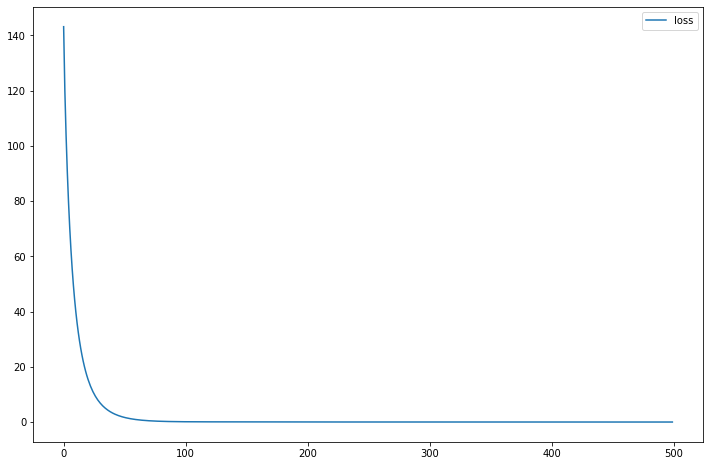

In [25]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot(figsize=(12,8))

In [26]:
# Get predictions on test data
preds = model.predict(X_test)

# Save to CSV file
output = pd.DataFrame({'Id': test.Id,'SalePrice': preds.ravel()})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
